In [3]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from keras.layers import MaxPooling2D , Input ,Activation
from keras import backend as K
from keras.optimizers import SGD

from sklearn.model_selection import train_test_split

np.random.seed(1)
from tqdm import tqdm

Using TensorFlow backend.


In [4]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []
shape = (50,50)  
train_path = 'Train(500)'

for filename in tqdm(os.listdir('Train(500)')):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

100%|█████████████████████████████████████████████████████████████████████████████| 6046/6046 [00:43<00:00, 137.55it/s]


In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(4534, 50, 50, 3)
(4534, 10)
(1512, 50, 50, 3)
(1512, 10)


In [11]:
# Processing testing data
# -> appending images in a list 'test_images'
# -> appending labels in a list 'test_labels'
# The test data contains labels as well also we are appending it to a list but we are'nt going to use it while training.

test_images = []
test_labels = []
shape = (50,50)
test_path = 'Test(500)'

for filename in tqdm(os.listdir('Test(500)')):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)

100%|█████████████████████████████████████████████████████████████████████████████| 2163/2163 [00:15<00:00, 139.04it/s]


[1 0 0 0 0 0 0 0 0 0]


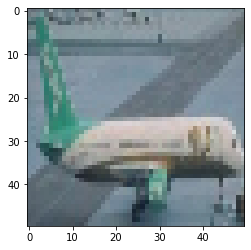

In [12]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[0])

[1 0 0 0 0 0 0 0 0 0]


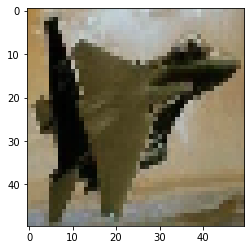

In [13]:
# Visualizing Training data
print(train_labels[4])
plt.imshow(train_images[4])

In [14]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(50,50,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 30)        8670      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 30)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 30)        8130      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 30)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)             

In [15]:
# Training the model
history = model.fit(x_train,y_train,epochs=25,batch_size=50,validation_data=(x_val,y_val))


Train on 4534 samples, validate on 1512 samples
Epoch 1/25
4534/4534 [==============================] - 9s 2ms/step - loss: 2.0210 - acc: 0.2572 - val_loss: 1.7458 - val_acc: 0.3995
Epoch 2/25
4534/4534 [==============================] - 3s 663us/step - loss: 1.5310 - acc: 0.4687 - val_loss: 1.3609 - val_acc: 0.5172
Epoch 3/25
4534/4534 [==============================] - 3s 664us/step - loss: 1.2115 - acc: 0.5807 - val_loss: 1.1298 - val_acc: 0.5952
Epoch 4/25
4534/4534 [==============================] - 3s 663us/step - loss: 0.9977 - acc: 0.6337 - val_loss: 1.0525 - val_acc: 0.6058
Epoch 5/25
4534/4534 [==============================] - 3s 663us/step - loss: 0.8704 - acc: 0.6853 - val_loss: 0.9876 - val_acc: 0.6396
Epoch 6/25
4534/4534 [==============================] - 3s 663us/step - loss: 0.7679 - acc: 0.7228 - val_loss: 0.9383 - val_acc: 0.6620
Epoch 7/25
4534/4534 [==============================] - 3s 663us/step - loss: 0.6836 - acc: 0.7541 - val_loss: 1.0091 - val_acc: 0.6442
E

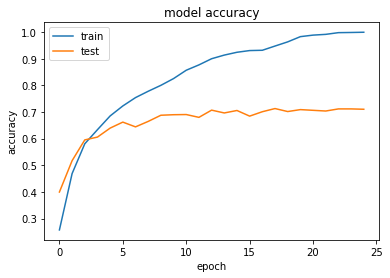

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

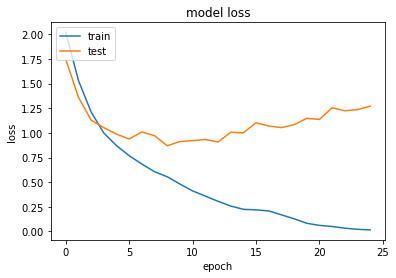

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# Evaluating model on validation data
score = model.evaluate(x_val, y_val, verbose=1)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

1512/1512 [==============================] - 1s 727us/step
Test accuracy: 71.0317%


In [19]:
model.save_weights("MultiClasss_CNN_Keras(Model-1).h5")
print("Saved model to disk")

Saved model to disk


In [23]:
img = cv2.imread('Elephant_3.jpg')
img = cv2.resize(img,(50,50))
img = np.reshape(img,[1,50,50,3])

classes = model.predict_classes(img)

print (classes)

[6]


In [26]:
def get_class_name(classes):
    if classes==0:
        return "Airoplane"
    if classes==1:
        return "Bus"
    if classes==2:
        return "Butterfly"
    if classes==3:
        return "Car"
    if classes==4:
        return "Cat"
    if classes==5:
        return "Dog"
    if classes==6:
        return "Elephant"
    if classes==7:
        return "Flower"
    if classes==8:
        return "Horse"
    if classes==9:
        return "Motorbike"

In [27]:
get_class_name(classes)

'Elephant'

In [39]:
def predict_class(img):
    img = cv2.imread(img)
    img = cv2.resize(img,(50,50))
    img = np.reshape(img,[1,50,50,3])

    return model.predict_classes(img)

In [43]:
get_class_name(predict_class('Car_19.jpg'))

'Car'